In [1]:
import networkx as nx         #pacchetto per reti
import numpy as np
import ipyparallel as ipp     #pacchetto per parallelizzazione
import time as clock
import matplotlib.pyplot as plt
from scipy import stats
import pickle
#import winsound
from Node import *            #pacchetto agente Node
from NetworkTool import *     #pacchetto rete
from GenerativeTool import *  #pacchetto generazione rete
from VoteTool import *        #pacchetto analisi voto
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
     
    for i in range(Nodes):
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        MG.add_node(Node(MG.number_of_nodes(),tfix,tvar, np.random.random(),TheTime)) #create nodes with FB fix belief and VB var beli
        
    TheTime=TheTime+1

    for i in range(MG.number_of_nodes()):
        tlay = np.random.randint(LayerC)
        MG.nodes()[i].aggF(TheTime)
        AttachChoosenBelief(MG, MG.nodes()[i], np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay],TheTime) #every node search for friends
    print(' Time ', TheTime)

In [3]:
def Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    for j in range(Iter): #creating and adding
        TheTime = TheTime+1
        LayerB = ((LayerA-LayerC)//(Iter-1))*j + LayerC
        NodesB = NodesA//Iter
        print('Iter ',j,' Layers ', LayerB, ' Time ', TheTime)
        for i in range(NodesB):
            tfix=list(-2*np.random.random(FB)+1)
            tvar=list(-2*np.random.random(VB)+1)
            tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
            MG.add_node(tnew) 
            tnew.aggF(TheTime)
            tlay = np.random.randint(LayerB)
            AttachChoosenBelief(MG, tnew, np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay], TheTime)

    print(MG.number_of_nodes())
    print(' Time ', TheTime)

In [4]:
def Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    TheTime=TheTime+1 
    co=0
    while MG.number_of_nodes()<NodesA:
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
        MG.add_node(tnew) 
        tnew.aggF(TheTime)
        
    for i in MG.nodes():
        if len(MG.neighbors(i))==0:
            co=co+1
            RandomLink(MG, i, LayerA, TheTime)
    print("added: ",co,'; percentage: ', (co/MG.number_of_nodes())*100,'% ')
    print(' Time ', TheTime)
    return(co/MG.number_of_nodes())

In [5]:

VoDAvg, VoDSkew, VaDAvg, VaDSkew, ChiAvg = {}, {}, {}, {}, {}

NodeList=[500,1000,1500,2000]
FBlist=[5]
VBlist=[10,15,20]
LayerList=[4,6,8,12]
InfluDist=[0.2]


VaDAvg['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
VaDSkew['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
VaDAvg['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
VaDSkew['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}


print('\n', VaDAvg,'\n', VaDSkew)
    
for rep in range(1):
    print('\n Repetition',rep)
    
    for NodesA in NodeList:
        for FB in FBlist:
            for VB in VBlist:
                for LayerA in LayerList:
                    for InDi in InfluDist:
                        
                        #yeah
                        print('\n Setup',NodesA,FB,VB,LayerA,InDi)
                        
                        MG = nx.MultiGraph()
                        TheTime = 0
                        RndFr=3
                        Nodes=50 #core set of 50 nodes
                        Iter=3
                        LayerC=2 #core layers
                        bd=0.05 #abstension strip
                        issue=np.random.random(FB+VB) #voting issue
                        Keys = [NodesA, FB, VB, LayerA, InDi]
                        print(' Time ', TheTime)
                        
                        TmpVDA=[]
                        TmpVDS=[]

                        fbdist, fbpos, vbdist, vbpos, cbpos = [], [], [], [], []
                        for j in range(LayerA): #creates random vector in specified range
                            fbpos.append(list(np.random.randint(FB, size=np.random.randint(1,FB))))
                            fbdist.append(0.50*np.random.random()+0.2)
                        for j in range(LayerA): #creates random vector in specified range
                            vbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                            vbdist.append(0.50*np.random.random()+0.2)
                            cbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                        print('\n',fbdist,'\n',fbpos,'\n',vbdist,'\n',vbpos,'\n',cbpos)

                        Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        print(Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime))

                        print(TheTime)

                        #AllVoteA(MG, issue)
                       
                        tt=VarDistPrnt(MG,0)
                        TmpVDA.append(tt[0])
                        TmpVDS.append(tt[2])
                        for n in range(LayerA):
                            G = ExtractLayer(MG, n)
                            tt=VarDistPrnt(G,0)
                            TmpVDA.append(tt[0])
                            TmpVDS.append(tt[2])
                            
                        tt=VarDistPrnt(MG,0)
                        for key in Keys:
                            VaDAvg['proj'][key].append(TmpVDA[0])
                            VaDSkew['proj'][key].append(TmpVDS[0])
                        '''    
                        t0, t2 = [], []
                        for n in range(LayerA):
                            G = ExtractLayer(MG, n)
                            t0.append(VarDistPrnt(G,0)[0])
                            t2.append(VarDistPrnt(G,0)[2])
                        '''
                        for key in Keys:
                            VaDAvg['alay'][key].append(np.mean(TmpVDA[1:]))
                            VaDSkew['alay'][key].append(np.mean(TmpVDS[1:]))
                            
                        BaseAnalisys(MG,LayerA)


    with open('VaDAvgBDA.pickle', 'wb') as handle:
        pickle.dump(VaDAvg, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open('VaDSkewBDA.pickle', 'wb') as handle:
        pickle.dump(VaDSkew, handle, protocol=pickle.HIGHEST_PROTOCOL)



 {'alay': {0.2: [], 4: [], 5: [], 6: [], 8: [], 10: [], 12: [], 15: [], 2000: [], 1000: [], 500: [], 20: [], 1500: []}, 'proj': {0.2: [], 4: [], 5: [], 6: [], 8: [], 10: [], 12: [], 15: [], 2000: [], 1000: [], 500: [], 20: [], 1500: []}} 
 {'alay': {0.2: [], 4: [], 5: [], 6: [], 8: [], 10: [], 12: [], 15: [], 2000: [], 1000: [], 500: [], 20: [], 1500: []}, 'proj': {0.2: [], 4: [], 5: [], 6: [], 8: [], 10: [], 12: [], 15: [], 2000: [], 1000: [], 500: [], 20: [], 1500: []}}

 Repetition 0

 Setup 500 5 10 4 0.2
 Time  0

 [0.5308022778383761, 0.3575547082777636, 0.31973738106302735, 0.6206229699026107] 
 [[4], [1, 0], [2, 0, 0], [2, 4]] 
 [0.29505316962795464, 0.49089116193402577, 0.6619030722785865, 0.2830899103348074] 
 [[8, 7, 9, 5, 8], [3, 8, 1, 0, 6, 7, 9], [0, 9, 2, 2, 8], [3, 8, 9, 1]] 
 [[0, 2, 6, 4, 7, 1, 7, 0], [6, 6, 6, 1, 9, 4, 2, 6], [5], [5, 4, 8, 7, 1]]
 Time  1
Iter  0  Layers  2  Time  1
Iter  1  Layers  3  Time  2
Iter  2  Layers  4  Time  3
548
 Time  3
added:  189 ; 

C:\Users\Francesco\Anaconda4\lib\site-packages\networkx\algorithms\assortativity\correlation.py:285: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


 Time  1
Iter  0  Layers  2  Time  1
Iter  1  Layers  5  Time  2
Iter  2  Layers  8  Time  3
548
 Time  3
added:  60 ; percentage:  10.948905109489052 % 
 Time  1
0.10948905109489052
0
complete assortativity  0.105116231954

Layer 0
assortativity  0.188320973696
clustering  0.048270089285714274
averagedegree  2.53125
nodes  256

Layer 1
assortativity  -0.175
clustering  0.0
averagedegree  1.08045977011
nodes  87

Layer 2
assortativity  0.0993265993266
clustering  0.019135802469135803
averagedegree  1.54320987654
nodes  162

Layer 3
assortativity  -0.0813008130081
clustering  0.0
averagedegree  1.21276595745
nodes  94

Layer 4
assortativity  -0.166391412056
clustering  0.010964912280701754
averagedegree  1.48684210526
nodes  152

Layer 5
assortativity  -0.390087929656
clustering  0.0
averagedegree  1.28767123288
nodes  73

Layer 6
assortativity  nan
clustering  0.0
averagedegree  1.0
nodes  6

Layer 7
assortativity  nan
clustering  0.0
averagedegree  1.0
nodes  24


 Setup 500 5 10 12 0

In [6]:
print(VoDAvg,'\n', VoDSkew,'\n', VaDAvg,'\n', VaDSkew,'\n', ChiAvg)


{} 
 {} 
 {'alay': {0.2: [2.3061313696478787, 2.3961087476975802, 2.2201360594995725, 2.2413599209404924, 2.9461876650837011, 3.0078560553726756, 2.8993329267351706, 2.9864765677473457, 3.5208608173849552, 3.3652404923511576, 3.5092243927010127, 3.5297066384819931, 2.3969606398711933, 2.3714615981361615, 2.2581279001110759, 2.1764854055634513, 2.7404399423265073, 3.0514436627866126, 2.9580620044569925, 2.9240707334916141, 3.3817426690130667, 3.4740163384836595, 3.5146827307239135, 3.4980070908738052, 1.9974633649117131, 2.2603171594161693, 2.2616331622621848, 2.2064793209629827, 2.7379867746340625, 3.067319442126188, 2.9702474735884721, 2.8018385681189906, 3.5298455877295423, 3.5231116269829421, 3.414474205668709, 3.4223853182459645, 2.2129839336394519, 2.3861547454140246, 2.1989362997806827, 2.1472320006755434, 2.8583823294092188, 3.0082319722330788, 3.0236648231646326, 2.9214920795482038, 3.4493815008854196, 3.5164842666366938, 3.5303676018162484, 3.4526088860247377], 4: [2.306131369

In [7]:
#VoteAnalysis(MG, issue, bd,1)
#VoteALayerLight(MG, issue, bd, 0, LayerA)

In [8]:
#PollLayers(MG, 100, 100, bd, issue, 1, 2, 1)

In [9]:
#PlotLayer(MG,LayerA)

In [10]:
'''
VoDAvg, VoDSkew, VaDAvg, VaDSkew, ChiAvg
[proj] [alay]
NodeList=[500,1000,2000,3000]
FBlist=[5]
VBlist=[10]
LayerList=[4,8,12]
InfluDist=[0.2]
'''

'\nVoDAvg, VoDSkew, VaDAvg, VaDSkew, ChiAvg\n[proj] [alay]\nNodeList=[500,1000,2000,3000]\nFBlist=[5]\nVBlist=[10]\nLayerList=[4,8,12]\nInfluDist=[0.2]\n'


 VaDAvg alay Nodes 

value 500 , average 2.91071847114 , st dev 0.490923958848
value 1000 , average 2.89545839299 , st dev 0.484509234044
value 1500 , average 2.84942516705 , st dev 0.537967939681
value 2000 , average 2.8921600366 , st dev 0.516982775383


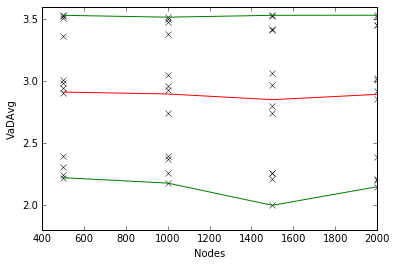


 VaDAvg alay Layers 

value 4 , average 2.83986388288 , st dev 0.518052317966
value 6 , average 2.95231217564 , st dev 0.462078099858
value 8 , average 2.89657413171 , st dev 0.517019667729
value 12 , average 2.85901187756 , st dev 0.527202641865


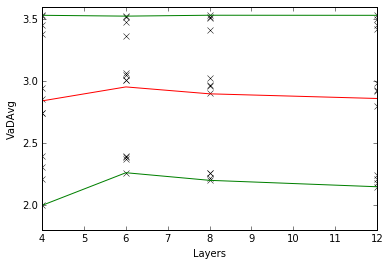


 VaDAvg alay VarBelief 

value 10 , average 2.25237322678 , st dev 0.101913976631
value 15 , average 2.9314395638 , st dev 0.0986757528212
value 20 , average 3.47700876025 , st dev 0.0540546593323


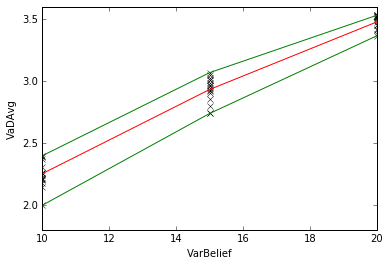


 VaDAvg proj Nodes 

value 500 , average 2.9078881028 , st dev 0.487251547459
value 1000 , average 2.8629937662 , st dev 0.48709886037
value 1500 , average 2.83225191328 , st dev 0.515030138519
value 2000 , average 2.87409480089 , st dev 0.484179943115


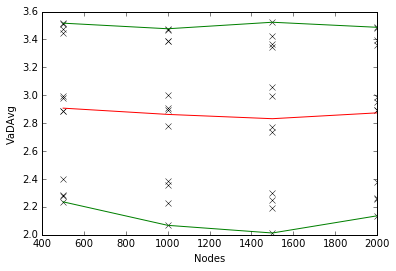


 VaDAvg proj Layers 

value 4 , average 2.83657690443 , st dev 0.509764070577
value 6 , average 2.92949894205 , st dev 0.446543331677
value 8 , average 2.88661505305 , st dev 0.485097298416
value 12 , average 2.82453768364 , st dev 0.525082906785


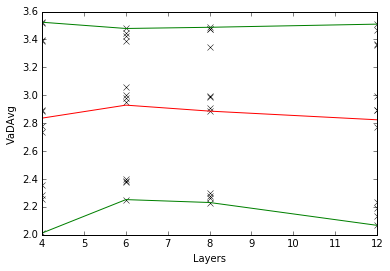


 VaDAvg proj VarBelief 

value 10 , average 2.25167645201 , st dev 0.105802003606
value 15 , average 2.91496145744 , st dev 0.0882083817741
value 20 , average 3.44128352792 , st dev 0.0573039239154


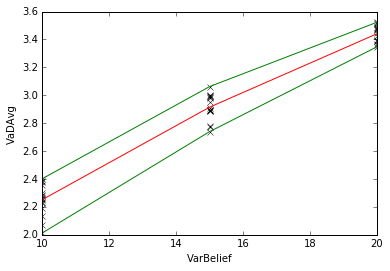


 VaDSkew alay Nodes 

value 500 , average -0.0650347222222 , st dev 0.177446886479
value 1000 , average -0.0488194444444 , st dev 0.140363989597
value 1500 , average 0.02125 , st dev 0.177793998826
value 2000 , average 0.0352777777778 , st dev 0.119299330455


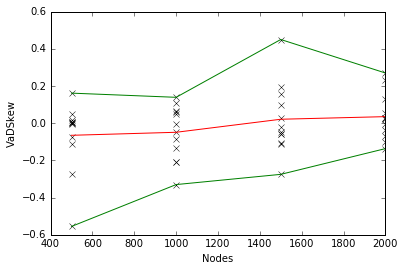


 VaDSkew alay Layers 

value 4 , average 0.0679166666667 , st dev 0.135699704208
value 6 , average -0.138333333333 , st dev 0.172758126785
value 8 , average -0.0294791666667 , st dev 0.125246068565
value 12 , average 0.0425694444444 , st dev 0.122331922833


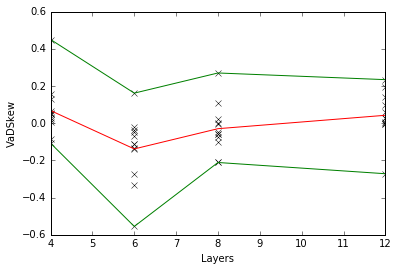


 VaDSkew alay VarBelief 

value 10 , average 0.0373958333333 , st dev 0.210254191603
value 15 , average -0.04859375 , st dev 0.145566636716
value 20 , average -0.031796875 , st dev 0.0940146402271


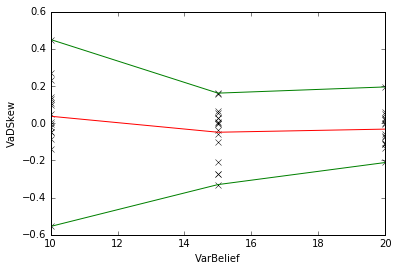


 VaDSkew proj Nodes 

value 500 , average -0.00166666666667 , st dev 0.154964153561
value 1000 , average 0.00166666666667 , st dev 0.216596142368
value 1500 , average 0.126666666667 , st dev 0.216615378545
value 2000 , average 0.0366666666667 , st dev 0.139184130641


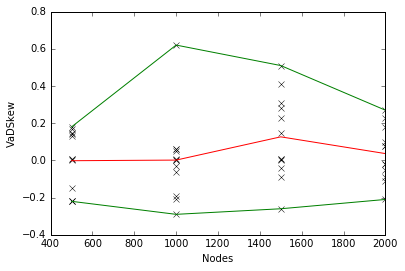


 VaDSkew proj Layers 

value 4 , average 0.0766666666667 , st dev 0.194093333791
value 6 , average -0.0658333333333 , st dev 0.115791359301
value 8 , average -0.0075 , st dev 0.14549484527
value 12 , average 0.16 , st dev 0.215638586528


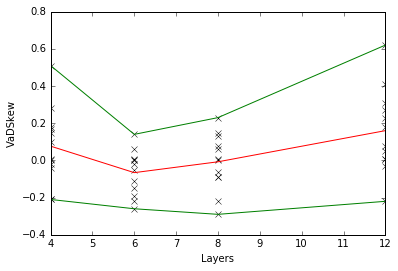


 VaDSkew proj VarBelief 

value 10 , average 0.1025 , st dev 0.217987958383
value 15 , average -0.0125 , st dev 0.196452920569
value 20 , average 0.0325 , st dev 0.134652330095


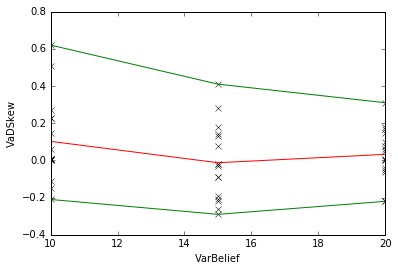

In [15]:
funname = ['VaDAvg', 'VaDSkew']
dictionary = [VaDAvg, VaDSkew]
#n=0
setting = ['alay','proj']
#m=1
varname = ['Nodes','Layers','VarBelief']
varlist = [NodeList, LayerList, VBlist]
#o=1

for n in range(len(dictionary)):
    for m in range(len(setting)):
        for o in range(len(varlist)):

            temp0 = []
            temp1 = []
            temp2 = []
            temp3 = []
            print('\n', funname[n], setting[m], varname[o],'\n')

            for j in varlist[o]:
                #print(j)
                temp0.append(dictionary[n][setting[m]][j])
                temp1.append(np.nanmean(dictionary[n][setting[m]][j]))
                temp2.append(np.nanmax(dictionary[n][setting[m]][j]))
                temp3.append(np.nanmin(dictionary[n][setting[m]][j]))

                print('value',j,', average',np.nanmean(dictionary[n][setting[m]][j]),', st dev',np.nanstd(dictionary[n][setting[m]][j]))

            plt.plot(varlist[o],temp0, 'kx')
            plt.plot(varlist[o],temp1, 'r-')
            plt.plot(varlist[o],temp2, 'g-')
            plt.plot(varlist[o],temp3, 'g-')
            plt.ylabel(funname[n])
            plt.xlabel(varname[o])
            plt.savefig('BDA'+funname[n]+setting[m]+varname[o]+'.png',orientation='landscape',bbox_inches='tight',dpi='figure')
            plt.show()